In [95]:
# Affichage du WER moyen par variante de prétraitement
classement = df.groupby('parametres_traitement')['cer'].mean().sort_values()
display(classement)

parametres_traitement
-resize 200% -colorspace Gray -median 3 -normalize                                       0.663551
-resize 200% -colorspace Gray -normalize -auto-threshold Otsu                            0.669708
-resize 200% -colorspace Gray -auto-gamma -auto-threshold Otsu                           0.676827
-resize 200% -colorspace Gray -normalize -deskew 40% -auto-threshold Otsu                0.687980
-resize 200% -colorspace Gray -auto-level -normalize -auto-threshold Otsu                0.700707
-resize 200% -colorspace Gray -normalize -sharpen 0x1 -auto-threshold Otsu               0.703228
-resize 200% -colorspace Gray -deskew 40% -normalize -auto-threshold Otsu                0.726783
-resize 200% -colorspace Gray -normalize -background white -flatten                      0.737246
-resize 200% -colorspace Gray -blur 1x1 -auto-threshold Otsu                             0.747103
-resize 200% -colorspace Gray -white-threshold 80% -normalize -auto-threshold Otsu       0.75371

In [116]:
import pandas as pd

df = pd.read_csv("DB/currentFolder/out/score_final.csv")
display(df.head())
print(df.shape)

,fichier,cat,cer,jacc_multi,ratios_mean,parametres_traitement
0,e41f7bf4b17794c3b4c9190057edec1e9c560e67fe482e...,financial_reports,0.02,0.94,0.64,-resize 200% -colorspace Gray -normalize -back...
1,e41f7bf4b17794c3b4c9190057edec1e9c560e67fe482e...,financial_reports,0.03,0.83,0.63,-resize 200% -colorspace Gray -normalize -auto...
2,56f284063b796db005fe021fe6f54ed7f0d10388815a88...,manuals,0.17,0.88,0.56,-resize 200% -colorspace Gray -normalize -back...
3,601febfd3972ff8015d3f121d6716a9b915533f309883a...,patents,0.48,0.58,0.53,-resize 200% -colorspace Gray -normalize -back...
4,42fdccb4bfa1140581ba427f7da4d7b8a53bcb03e5e055...,manuals,0.62,0.48,0.30,-resize 200% -colorspace Gray -normalize -back...


(1811, 6)


In [118]:
df.loc[df['cer'] > 2, 'cer'] = 2

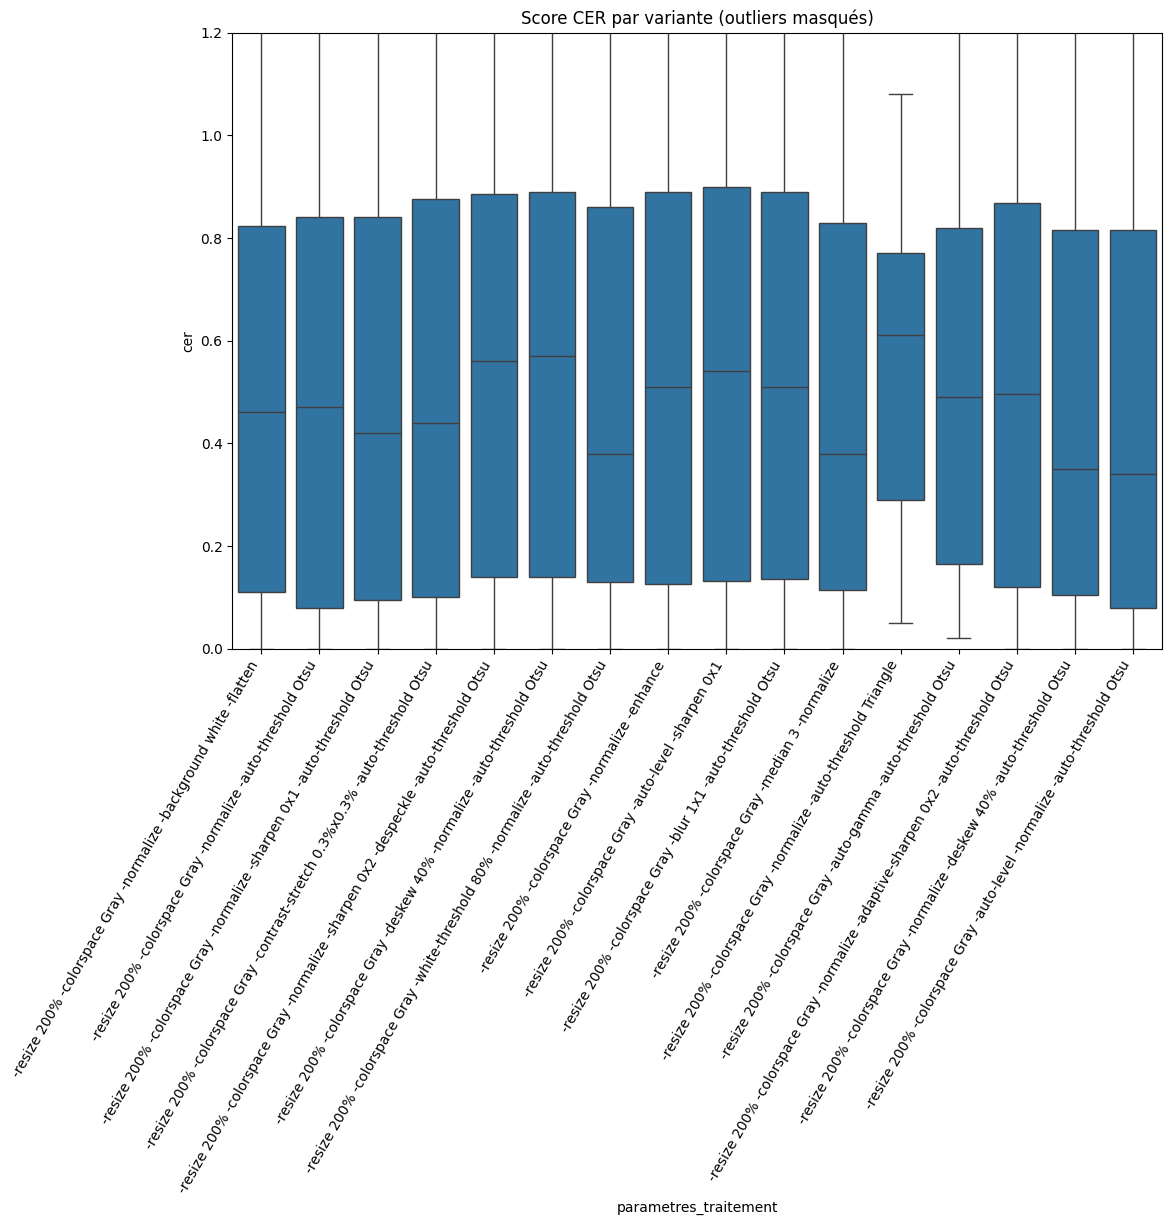

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="parametres_traitement", y="cer")
plt.xticks(rotation=60, ha="right")
plt.ylim(0, 1.2)  # Limite l’axe y à 1.2
plt.title("Score CER par variante (outliers masqués)")
plt.show()

In [120]:
# 3. Afficher la variante la plus performante pour chaque page selon le WER
idx_best_wer = df.groupby('fichier')['cer'].idxmin()
df.loc[idx_best_wer].sort_values('cer')

,fichier,cat,cer,jacc_multi,ratios_mean,parametres_traitement
963,4d9297edf17763150c04fb2b49a4b28791cba63b1d1189...,laws_and_regulations,0.00,1.00,0.60,-resize 200% -colorspace Gray -normalize -back...
7,04f1fe91787710fb9d28ae9dbb840a72f9a4aa47082b5c...,manuals,0.01,1.00,0.63,-resize 200% -colorspace Gray -normalize -back...
82,38dcda0e37c4b5acc80f9952e97c213013154590f83b61...,manuals,0.01,0.93,0.61,-resize 200% -colorspace Gray -normalize -shar...
1389,090e3d2af31a228063f226be41958b999bdca339ff9c33...,manuals,0.01,0.99,0.63,-resize 200% -colorspace Gray -normalize -back...
976,7672298edc56d3ce972d879f345e70331b103a9f8ac6c4...,manuals,0.01,0.97,0.61,-resize 200% -colorspace Gray -normalize -back...
...,...,...,...,...,...,...
528,2a7d2bb7cd6eb6c9c2790ac3826264dd44989353a5eaaa...,scientific_articles,1.00,0.00,0.00,-resize 200% -colorspace Gray -normalize -back...
125,54136c909661ea088d7c825d90289eef65546501748894...,laws_and_regulations,1.00,0.00,0.20,-resize 200% -colorspace Gray -normalize -back...
16,c89de3e108a8ff86a04af6d817978d037daab718a66d5d...,financial_reports,1.00,0.00,0.11,-resize 200% -colorspace Gray -normalize -back...
524,b9884c5e29975ef8ce92f758b8fccbcfba1df6ab463848...,financial_reports,1.08,0.29,0.47,-resize 200% -colorspace Gray -normalize -auto...


In [121]:
# 4. Afficher la variante la plus performante pour chaque page selon le score global
idx_best_global = df.groupby('fichier')['cer'].idxmin()
df.loc[idx_best_global].sort_values('cer', ascending=False)

,fichier,cat,cer,jacc_multi,ratios_mean,parametres_traitement
1544,ce14a9e93aadabb89005c15a8b594e617f7f1bf1b507cb...,patents,2.00,0.15,0.18,-resize 200% -colorspace Gray -normalize -back...
524,b9884c5e29975ef8ce92f758b8fccbcfba1df6ab463848...,financial_reports,1.08,0.29,0.47,-resize 200% -colorspace Gray -normalize -auto...
18,2371c0c368275bfd933d16d62a3c553965cc76c918d2c5...,scientific_articles,1.00,0.00,0.00,-resize 200% -colorspace Gray -normalize -back...
125,54136c909661ea088d7c825d90289eef65546501748894...,laws_and_regulations,1.00,0.00,0.20,-resize 200% -colorspace Gray -normalize -back...
16,c89de3e108a8ff86a04af6d817978d037daab718a66d5d...,financial_reports,1.00,0.00,0.11,-resize 200% -colorspace Gray -normalize -back...
...,...,...,...,...,...,...
976,7672298edc56d3ce972d879f345e70331b103a9f8ac6c4...,manuals,0.01,0.97,0.61,-resize 200% -colorspace Gray -normalize -back...
578,f8908cb30bff20e344e872f1834ed40c03ba2f77f45aa0...,manuals,0.01,0.91,0.42,-resize 200% -colorspace Gray -normalize -auto...
41,e41f7bf4b17794c3b4c9190057edec1e9c560e67fe482e...,financial_reports,0.01,1.00,0.67,-resize 200% -colorspace Gray -auto-level -sha...
641,fc16c317ff91df369c23dfa2f926a2ff70c5fcc800990d...,manuals,0.01,0.98,0.42,-resize 200% -colorspace Gray -normalize -back...


In [122]:
# 8. Comparer les scores moyens par méthode
df.groupby('parametres_traitement')[['cer']].mean().sort_values('cer', ascending=False)

,cer
parametres_traitement,
-resize 200% -colorspace Gray -normalize -auto-threshold Triangle,0.577429
-resize 200% -colorspace Gray -auto-level -sharpen 0x1,0.570455
-resize 200% -colorspace Gray -normalize -sharpen 0x2 -despeckle -auto-threshold Otsu,0.559739
-resize 200% -colorspace Gray -deskew 40% -normalize -auto-threshold Otsu,0.555043
-resize 200% -colorspace Gray -blur 1x1 -auto-threshold Otsu,0.550093
-resize 200% -colorspace Gray -normalize -enhance,0.539910
-resize 200% -colorspace Gray -normalize -adaptive-sharpen 0x2 -auto-threshold Otsu,0.524020
-resize 200% -colorspace Gray -auto-gamma -auto-threshold Otsu,0.521827
-resize 200% -colorspace Gray -contrast-stretch 0.3%x0.3% -auto-threshold Otsu,0.519262


In [123]:
# 3. Analyse des “meilleures variantes” pour chaque document
df['cer'] = df['cer'].fillna(1)
best_by_doc = df.loc[df.groupby('fichier')['cer'].idxmin()]
best_counts = best_by_doc['parametres_traitement'].value_counts()
print(best_counts)

parametres_traitement
-resize 200% -colorspace Gray -normalize -background white -flatten                      52
-resize 200% -colorspace Gray -normalize -auto-threshold Triangle                        14
-resize 200% -colorspace Gray -auto-gamma -auto-threshold Otsu                           13
-resize 200% -colorspace Gray -auto-level -sharpen 0x1                                   12
-resize 200% -colorspace Gray -normalize -sharpen 0x1 -auto-threshold Otsu               10
-resize 200% -colorspace Gray -normalize -auto-threshold Otsu                             6
-resize 200% -colorspace Gray -median 3 -normalize                                        6
-resize 200% -colorspace Gray -blur 1x1 -auto-threshold Otsu                              5
-resize 200% -colorspace Gray -normalize -sharpen 0x2 -despeckle -auto-threshold Otsu     5
-resize 200% -colorspace Gray -contrast-stretch 0.3%x0.3% -auto-threshold Otsu            5
-resize 200% -colorspace Gray -normalize -enhance         

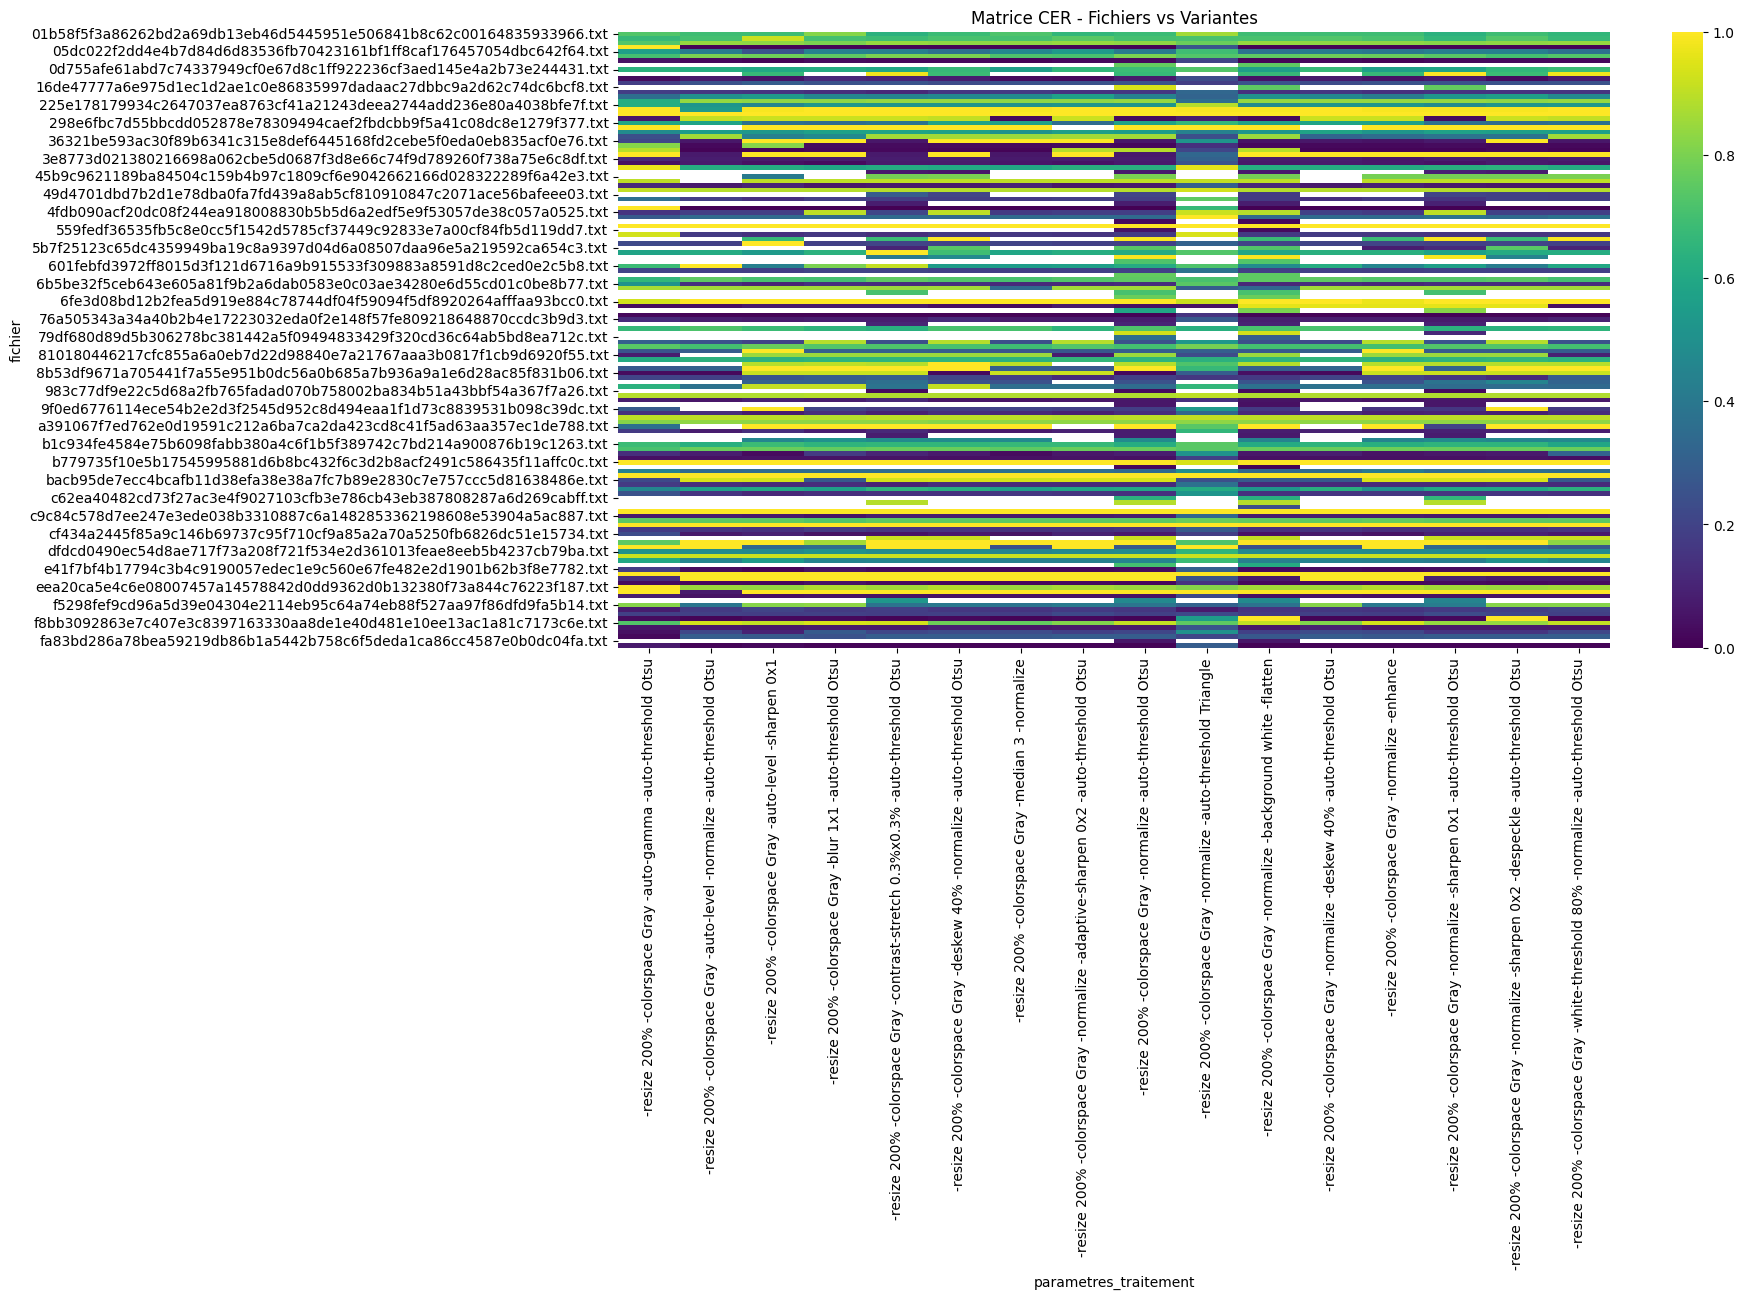

In [124]:
# 1. Tableau croisé (pivot table) : document x variante
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot table : index=fichier, columns=variante, values=cer
pivot = df.pivot(index="fichier", columns="parametres_traitement", values="cer")

plt.figure(figsize=(16, 8))
sns.heatmap(pivot, cmap="viridis", vmax=1)  # vmax limite l'affichage
plt.title("Matrice CER - Fichiers vs Variantes")
plt.show()

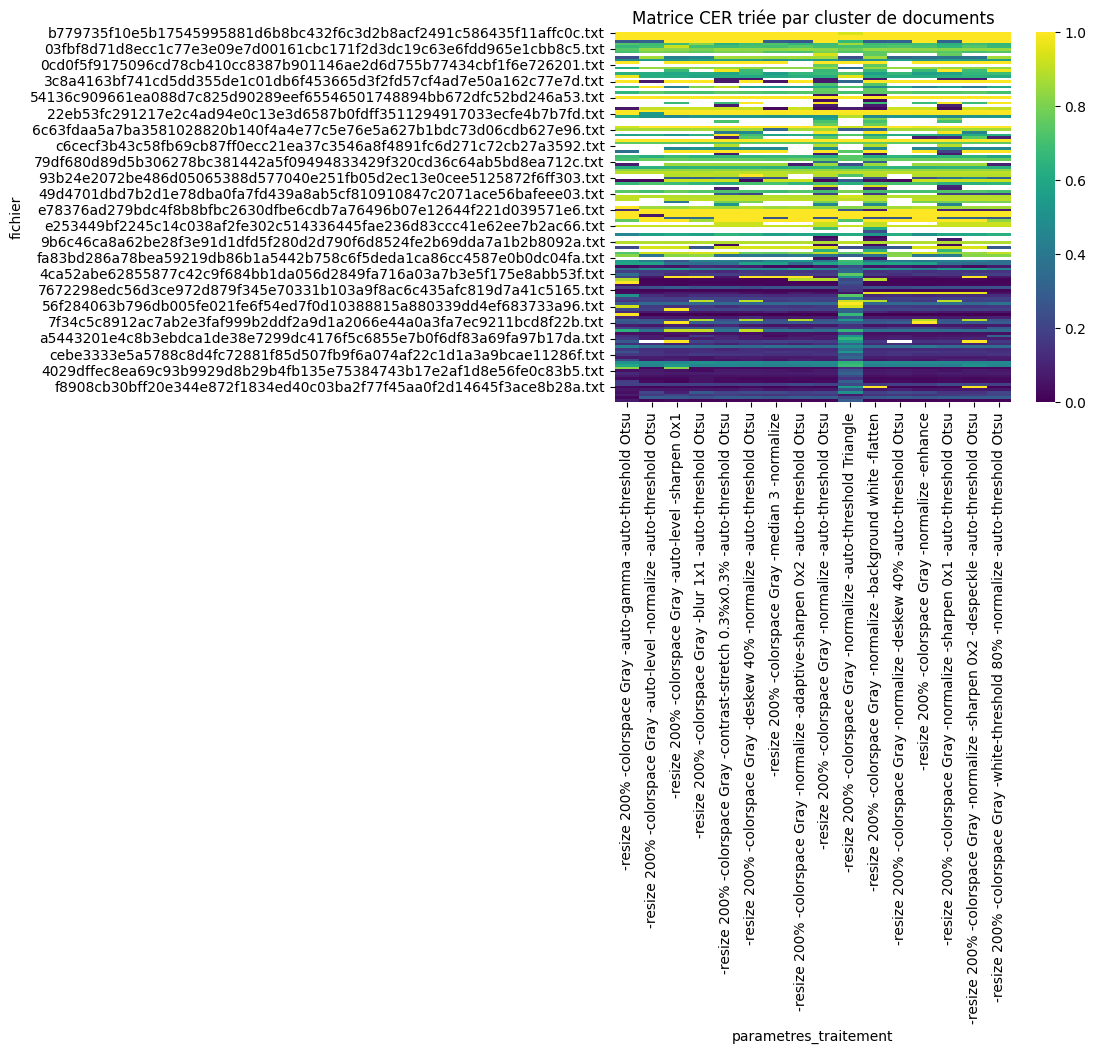

In [125]:
# 2. Clustering/Grouping des résultats
from sklearn.cluster import KMeans

X = pivot.fillna(1).values  # remplace les NaN (cas non testé) par un score mauvais
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
df_clusters = pd.DataFrame({'fichier': pivot.index, 'cluster': kmeans.labels_})
pivot['cluster'] = kmeans.labels_

# Visualiser les profils
pivot_sorted = pivot.sort_values('cluster')
sns.heatmap(pivot_sorted.iloc[:,:-1], cmap="viridis", vmax=1)
plt.title("Matrice CER triée par cluster de documents")
plt.show()

ValueError: The condensed distance matrix must contain only finite values.

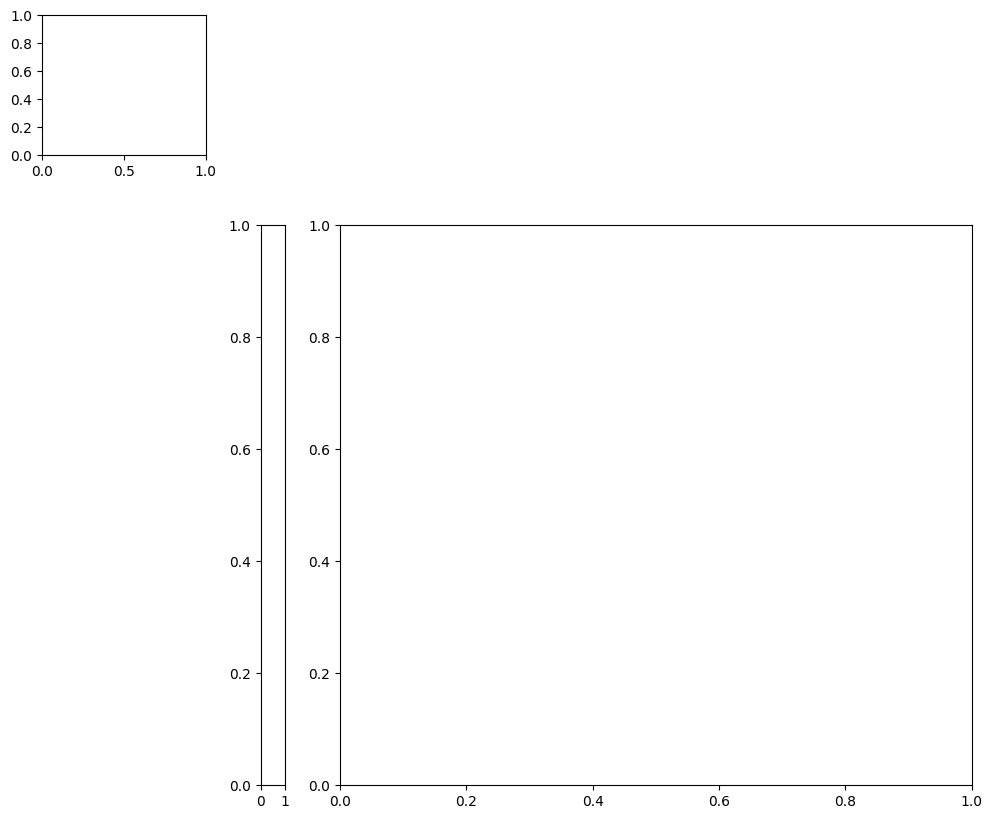

In [126]:
# 8. Comparer les scores moyens par méthode
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Récupère l’ordre des clusters
row_colors = pivot_sorted['cluster'].map({0: 'red', 1: 'green', 2: 'blue',})

sns.clustermap(
    pivot_sorted.iloc[:, :-1],  # retire la colonne 'cluster'
    row_colors=row_colors,
    figsize=(12, 10),
    cmap='viridis',
    vmin=0, vmax=1
)
plt.title("CER par cluster (couleurs = cluster)")
plt.show()


In [127]:
# 8. Comparer les scores moyens par méthode
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# On ne garde que les colonnes intéressantes
vars_clustering = ["cer", "jacc_multi", "ratios_mean", "parametres_traitement", "fichier"]
df = df[vars_clustering].dropna()

# Optionnel : standardise les variables (important pour le clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[["cer", "jacc_multi", "ratios_mean"]])

# Clustering
kmeans = KMeans(n_clusters=3, random_state=0)
df["cluster"] = kmeans.fit_predict(X_scaled)

print(df.groupby("parametres_traitement")["cluster"].value_counts())

parametres_traitement                                                                  cluster
-resize 200% -colorspace Gray -auto-gamma -auto-threshold Otsu                         2          40
                                                                                       0          34
                                                                                       1          30
-resize 200% -colorspace Gray -auto-level -normalize -auto-threshold Otsu              0          47
                                                                                       2          30
                                                                                       1          22
-resize 200% -colorspace Gray -auto-level -sharpen 0x1                                 0          42
                                                                                       1          36
                                                                                       2         

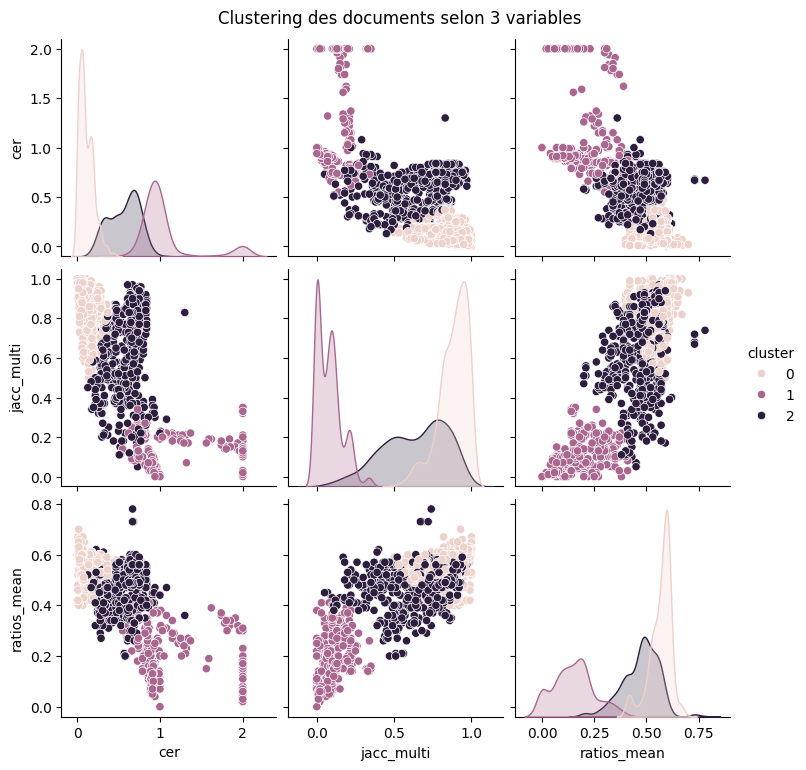

In [128]:
# 8. Comparer les scores moyens par méthode
sns.pairplot(df, vars=["cer", "jacc_multi", "ratios_mean"], hue="cluster")
plt.suptitle("Clustering des documents selon 3 variables", y=1.02)
plt.show()

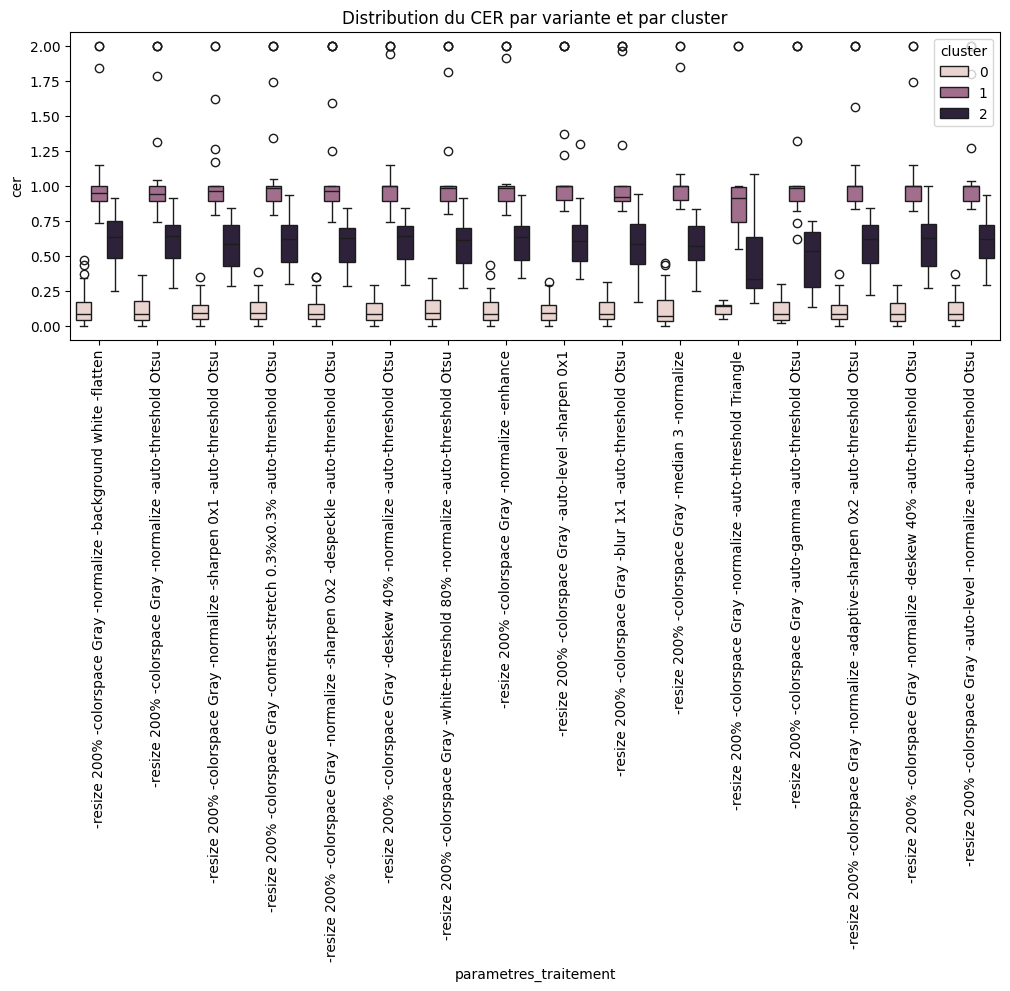

In [129]:
plt.figure(figsize=(12,4))
sns.boxplot(x="parametres_traitement", y="cer", hue="cluster", data=df)
plt.xticks(rotation=90)
plt.title("Distribution du CER par variante et par cluster")
plt.show()

In [139]:
print(df.groupby("cluster")[["cer", "jacc_multi", "ratios_mean"]].mean())

              cer  jacc_multi  ratios_mean
cluster                                   
0        0.110056    0.880014     0.566634
1        1.048191    0.079086     0.151712
2        0.567388    0.630692     0.471696


In [108]:
import pandas as pd

# Suppose df contient : fichier, cer, jacc_multi, ratios_mean, parametres_traitement

# Pour chaque doc, la variante à meilleur cer
idx_cer = df.groupby("fichier")["cer"].idxmin()
df_best_cer = df.loc[idx_cer, ["fichier", "parametres_traitement", "cer"]].rename(columns={"parametres_traitement": "best_cer_variante", "cer":"best_cer"})

# Pareil pour jacc_multi (max au lieu de min)
idx_jacc = df.groupby("fichier")["jacc_multi"].idxmax()
df_best_jacc = df.loc[idx_jacc, ["fichier", "parametres_traitement", "jacc_multi"]].rename(columns={"parametres_traitement": "best_jacc_variante", "jacc_multi":"best_jacc"})

# Et ratios_mean (selon ce que tu veux : plus proche de 1 ou max ? Ici max)
idx_ratios = df.groupby("fichier")["ratios_mean"].idxmax()
df_best_ratios = df.loc[idx_ratios, ["fichier", "parametres_traitement", "ratios_mean"]].rename(columns={"parametres_traitement": "best_ratios_variante", "ratios_mean":"best_ratios"})

# Fusionne tout
df_best = df_best_cer.merge(df_best_jacc, on="fichier").merge(df_best_ratios, on="fichier")

In [109]:
# Regroupement par triplet de variantes gagnantes
df_best["profil"] = df_best[["best_cer_variante", "best_jacc_variante", "best_ratios_variante"]].agg("_".join, axis=1)
profils = df_best["profil"].value_counts()
print("Répartition des profils de variantes gagnantes :")
print(profils)

Répartition des profils de variantes gagnantes :
profil
-resize 200% -colorspace Gray -normalize -background white -flatten_-resize 200% -colorspace Gray -normalize -background white -flatten_-resize 200% -colorspace Gray -normalize -background white -flatten      29
-resize 200% -colorspace Gray -auto-level -sharpen 0x1_-resize 200% -colorspace Gray -auto-level -sharpen 0x1_-resize 200% -colorspace Gray -auto-level -sharpen 0x1                                              4
-resize 200% -colorspace Gray -normalize -background white -flatten_-resize 200% -colorspace Gray -normalize -background white -flatten_-resize 200% -colorspace Gray -normalize -auto-threshold Otsu             4
-resize 200% -colorspace Gray -auto-level -sharpen 0x1_-resize 200% -colorspace Gray -normalize -background white -flatten_-resize 200% -colorspace Gray -normalize -background white -flatten                    3
-resize 200% -colorspace Gray -normalize -auto-threshold Triangle_-resize 200% -colorspace Gray 

In [110]:
import pandas as pd

# On suppose que df contient : fichier, cer, jacc_multi, ratios_mean, parametres_traitement

# --- Trouver la meilleure variante pour chaque document par critère ---

# Pour CER (le plus petit)
best_cer_idx = df.groupby("fichier")["cer"].idxmin()
best_cer_variantes = df.loc[best_cer_idx, "parametres_traitement"]

# Pour Jaccard multi (le plus grand)
best_jacc_idx = df.groupby("fichier")["jacc_multi"].idxmax()
best_jacc_variantes = df.loc[best_jacc_idx, "parametres_traitement"]

# Pour Ratios_mean (le plus grand, sauf si tu veux autre chose)
best_ratios_idx = df.groupby("fichier")["ratios_mean"].apply(lambda x: (x-1).abs().idxmin())
best_ratios_variantes = df.loc[best_ratios_idx, "parametres_traitement"]

# --- Compter la fréquence de chaque variante gagnante ---
classement_cer = best_cer_variantes.value_counts()
classement_jacc = best_jacc_variantes.value_counts()
classement_ratios = best_ratios_variantes.value_counts()

print("Classement des variantes (nb de fois meilleures sur CER):")
print(classement_cer)
print("\nClassement des variantes (nb de fois meilleures sur Jaccard):")
print(classement_jacc)
print("\nClassement des variantes (nb de fois meilleures sur Ratios_mean):")
print(classement_ratios)

classement_df = pd.DataFrame({
    "best_cer": classement_cer,
    "best_jacc": classement_jacc,
    "best_ratios": classement_ratios
}).fillna(0).astype(int).sort_values("best_cer", ascending=False)
print(classement_df)


Classement des variantes (nb de fois meilleures sur CER):
parametres_traitement
-resize 200% -colorspace Gray -normalize -background white -flatten                      51
-resize 200% -colorspace Gray -normalize -auto-threshold Triangle                        15
-resize 200% -colorspace Gray -auto-gamma -auto-threshold Otsu                           13
-resize 200% -colorspace Gray -auto-level -sharpen 0x1                                   12
-resize 200% -colorspace Gray -normalize -sharpen 0x1 -auto-threshold Otsu               10
-resize 200% -colorspace Gray -normalize -auto-threshold Otsu                             6
-resize 200% -colorspace Gray -median 3 -normalize                                        6
-resize 200% -colorspace Gray -blur 1x1 -auto-threshold Otsu                              5
-resize 200% -colorspace Gray -normalize -sharpen 0x2 -despeckle -auto-threshold Otsu     5
-resize 200% -colorspace Gray -contrast-stretch 0.3%x0.3% -auto-threshold Otsu            5


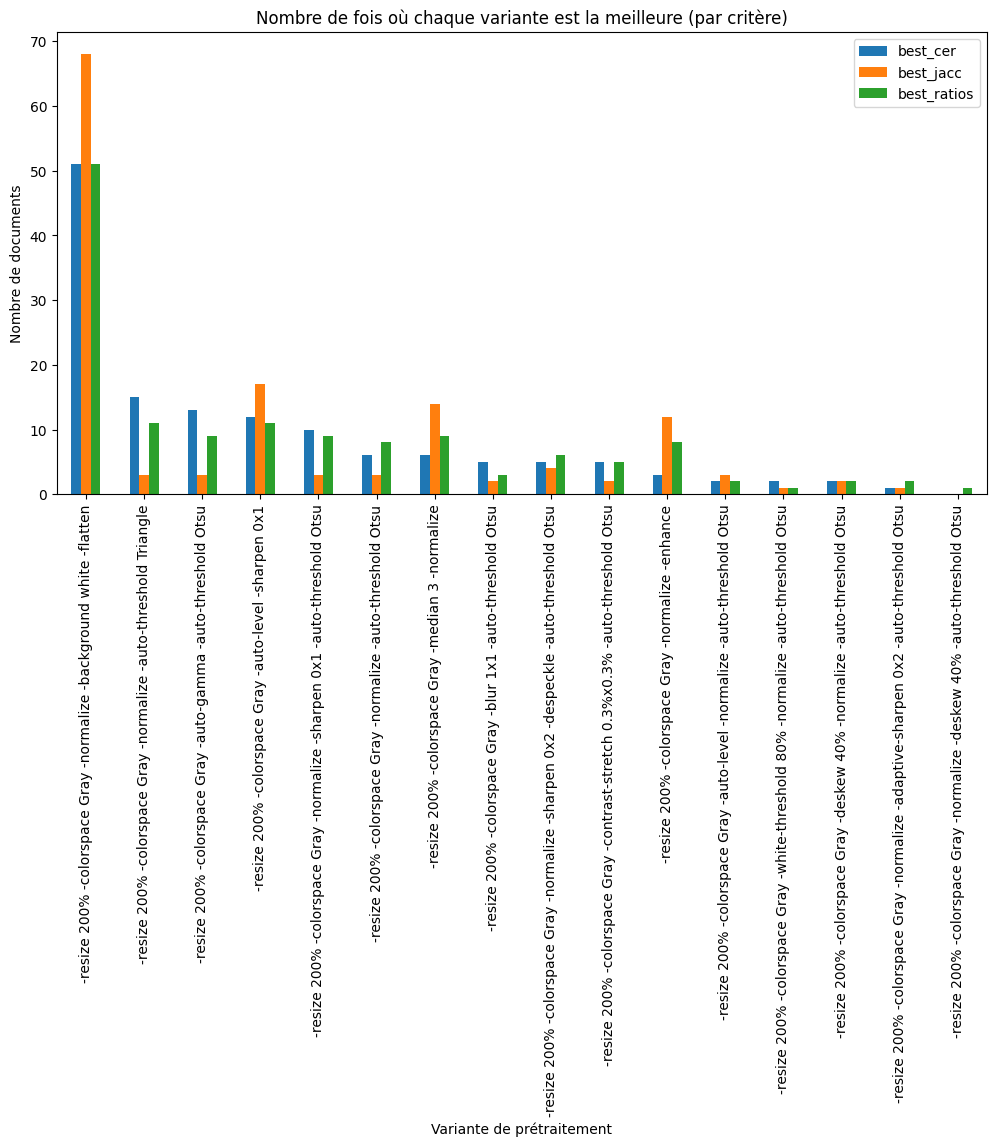

In [111]:
import matplotlib.pyplot as plt
classement_df.plot.bar(figsize=(12,6))
plt.title("Nombre de fois où chaque variante est la meilleure (par critère)")
plt.ylabel("Nombre de documents")
plt.xlabel("Variante de prétraitement")
plt.show()

In [112]:
import pandas as pd

# 2. Binariser le succès (ajuste les seuils si besoin)
df['succès'] = (df['cer'] < 0.08) | (df['jacc_multi'] > 0.92) | ((df['ratios_mean'] > 0.9) & (df['ratios_mean'] < 1.1))

# 3. Construire la matrice doc/variante
pivot = df.pivot_table(index='fichier', columns='parametres_traitement', values='succès', fill_value=0)

# 4. Initialisation
covered = set()
chosen_variants = []

# 5. Glouton : tant qu'il reste des documents non couverts…
while len(covered) < len(pivot):
    # Compter les docs nouvellement couverts par chaque variante
    best_variant = None
    best_gain = 0
    for v in pivot.columns:
        docs_covered = set(pivot.index[pivot[v]==1])
        gain = len(docs_covered - covered)
        if gain > best_gain:
            best_gain = gain
            best_variant = v
    if best_variant is None or best_gain == 0:
        break  # plus rien à gagner
    # Ajouter variante et marquer les docs couverts
    chosen_variants.append(best_variant)
    covered.update(pivot.index[pivot[best_variant]==1])
    print(f"Ajoutée : {best_variant} (couvre {best_gain} docs de plus, total couverts : {len(covered)})")

print("\nVariants choisis (ordre optimal glouton) :")
for i, v in enumerate(chosen_variants, 1):
    print(f"{i}. {v}")

print(f"\nCouvre {len(covered)}/{len(pivot)} documents ({100*len(covered)/len(pivot):.1f} %)")


Ajoutée : -resize 200% -colorspace Gray -normalize -background white -flatten (couvre 47 docs de plus, total couverts : 47)
Ajoutée : -resize 200% -colorspace Gray -auto-level -normalize -auto-threshold Otsu (couvre 6 docs de plus, total couverts : 53)
Ajoutée : -resize 200% -colorspace Gray -auto-level -sharpen 0x1 (couvre 3 docs de plus, total couverts : 56)
Ajoutée : -resize 200% -colorspace Gray -auto-gamma -auto-threshold Otsu (couvre 1 docs de plus, total couverts : 57)
Ajoutée : -resize 200% -colorspace Gray -median 3 -normalize (couvre 1 docs de plus, total couverts : 58)

Variants choisis (ordre optimal glouton) :
1. -resize 200% -colorspace Gray -normalize -background white -flatten
2. -resize 200% -colorspace Gray -auto-level -normalize -auto-threshold Otsu
3. -resize 200% -colorspace Gray -auto-level -sharpen 0x1
4. -resize 200% -colorspace Gray -auto-gamma -auto-threshold Otsu
5. -resize 200% -colorspace Gray -median 3 -normalize

Couvre 58/138 documents (42.0 %)


In [113]:
# 1️⃣ Trouver, pour chaque doc, la variante avec le meilleur CER (min) et le meilleur Jaccard (max)
idx_best_cer = df.groupby('fichier')['cer'].idxmin()
idx_best_jacc = df.groupby('fichier')['jacc_multi'].idxmax()

df_best_cer = df.loc[idx_best_cer, ['fichier', 'parametres_traitement', 'cer']]
df_best_jacc = df.loc[idx_best_jacc, ['fichier', 'parametres_traitement', 'jacc_multi']]

# 2️⃣ Afficher le classement des variantes (nb de fois meilleure)
print("\nClassement des variantes (nb de fois meilleures sur CER) :")
print(df_best_cer['parametres_traitement'].value_counts())
print("\nClassement des variantes (nb de fois meilleures sur Jaccard) :")
print(df_best_jacc['parametres_traitement'].value_counts())

# 3️⃣ Profils combinés CER/Jaccard
df_profils = pd.merge(
    df_best_cer[['fichier', 'parametres_traitement']].rename(columns={'parametres_traitement':'best_cer_variante'}),
    df_best_jacc[['fichier', 'parametres_traitement']].rename(columns={'parametres_traitement':'best_jacc_variante'}),
    on='fichier'
)

# On peut aussi ajouter la variante "ratios_mean" si tu veux (idem avec idxmax sur 'ratios_mean')
idx_best_ratios = df.groupby('fichier')['ratios_mean'].idxmax()
df_best_ratios = df.loc[idx_best_ratios, ['fichier', 'parametres_traitement']]
df_best_ratios = df_best_ratios.rename(columns={'parametres_traitement':'best_ratios_variante'})
df_profils = df_profils.merge(df_best_ratios, on='fichier')

# 4️⃣ Répartition des profils de variantes gagnantes (par couple gagnant)
df_profils['profil'] = df_profils[['best_cer_variante', 'best_jacc_variante']].agg('|'.join, axis=1)
print("\nRépartition des profils (meilleure variante CER + Jaccard) :")
print(df_profils['profil'].value_counts())

# 5️⃣ Facultatif : liste des documents par profil
for profil, subdf in df_profils.groupby('profil'):
    print(f"\nProfil {profil} : {len(subdf)} documents")
    print(subdf['fichier'].tolist())

# Pour aller plus loin : visualisation par heatmap, voir plus haut

# Tu peux aussi enregistrer les profils dans un CSV si besoin :
# df_profils.to_csv("profils_variantes_gagnantes.csv", index=False)


Classement des variantes (nb de fois meilleures sur CER) :
parametres_traitement
-resize 200% -colorspace Gray -normalize -background white -flatten                      51
-resize 200% -colorspace Gray -normalize -auto-threshold Triangle                        15
-resize 200% -colorspace Gray -auto-gamma -auto-threshold Otsu                           13
-resize 200% -colorspace Gray -auto-level -sharpen 0x1                                   12
-resize 200% -colorspace Gray -normalize -sharpen 0x1 -auto-threshold Otsu               10
-resize 200% -colorspace Gray -normalize -auto-threshold Otsu                             6
-resize 200% -colorspace Gray -median 3 -normalize                                        6
-resize 200% -colorspace Gray -blur 1x1 -auto-threshold Otsu                              5
-resize 200% -colorspace Gray -normalize -sharpen 0x2 -despeckle -auto-threshold Otsu     5
-resize 200% -colorspace Gray -contrast-stretch 0.3%x0.3% -auto-threshold Otsu            

In [137]:
grouped = df.groupby("parametres_traitement").agg(
    cer_mean = ("cer", "mean"),
    cer_std = ("cer", "std"),
    cer_med = ("cer", "median"),
    win_cer = ("cer", lambda x: (x == x.min()).sum()),
    jacc_mean = ("jacc_multi", "mean"),
    jacc_std = ("jacc_multi", "std"),
    jacc_med = ("jacc_multi", "median"),
    win_jacc = ("jacc_multi", lambda x: (x == x.max()).sum()),
    n_docs = ("fichier", "count")
).sort_values("cer_mean")

print(grouped)

                                                    cer_mean   cer_std  \
parametres_traitement                                                    
-resize 200% -colorspace Gray -auto-level -norm...  0.472929  0.439901   
-resize 200% -colorspace Gray -normalize -deske...  0.484747  0.433567   
-resize 200% -colorspace Gray -median 3 -normalize  0.485981  0.432568   
-resize 200% -colorspace Gray -normalize -sharp...  0.490394  0.419957   
-resize 200% -colorspace Gray -normalize -backg...  0.492464  0.415212   
-resize 200% -colorspace Gray -normalize -auto-...  0.506715  0.437661   
-resize 200% -colorspace Gray -white-threshold ...  0.512743  0.450002   
-resize 200% -colorspace Gray -contrast-stretch...  0.519262  0.448983   
-resize 200% -colorspace Gray -auto-gamma -auto...  0.521827  0.432908   
-resize 200% -colorspace Gray -normalize -adapt...  0.524020  0.454455   
-resize 200% -colorspace Gray -normalize -enhance   0.539910  0.456436   
-resize 200% -colorspace Gray -blur 1x

In [138]:
# Pour chaque variante, combien de fois “best” ET quelle est sa moyenne de score (CER moyen, etc.)
res = df.groupby("parametres_traitement")["cer"].agg(["mean", "min", "max", "count"]).sort_values("mean")
print(res)

                                                        mean   min  max  count
parametres_traitement                                                         
-resize 200% -colorspace Gray -auto-level -norm...  0.472929  0.00  2.0     99
-resize 200% -colorspace Gray -normalize -deske...  0.484747  0.00  2.0     99
-resize 200% -colorspace Gray -median 3 -normalize  0.485981  0.00  2.0    107
-resize 200% -colorspace Gray -normalize -sharp...  0.490394  0.00  2.0    127
-resize 200% -colorspace Gray -normalize -backg...  0.492464  0.00  2.0    138
-resize 200% -colorspace Gray -normalize -auto-...  0.506715  0.00  2.0    137
-resize 200% -colorspace Gray -white-threshold ...  0.512743  0.00  2.0    113
-resize 200% -colorspace Gray -contrast-stretch...  0.519262  0.00  2.0    122
-resize 200% -colorspace Gray -auto-gamma -auto...  0.521827  0.02  2.0    104
-resize 200% -colorspace Gray -normalize -adapt...  0.524020  0.00  2.0    102
-resize 200% -colorspace Gray -normalize -enhance   